Loading 20 newsgroups dataset for categories:
all
data loaded


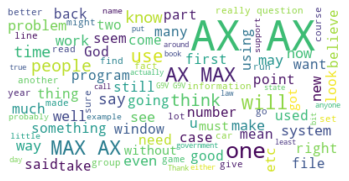

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
# % matplotlib inline

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups

categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories if categories else "all")

data_train = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42,
                                remove=('headers', 'footers', 'quotes'))

data_test = fetch_20newsgroups(subset='test', categories=categories,
                               shuffle=True, random_state=42,
                               remove=('headers', 'footers', 'quotes'))
print('data loaded')

# order of labels in `target_names` can be different from `categories`
target_names = data_train.target_names

text = ''
for i in range(len(data_train.data)):
    text += data_train.data[i]
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('tag-cloud.png')

# from nltk import ngrams
# 
# n = 2
# ngramsObj = ngrams(text.split(), n)
# for grams in ngramsObj:
#   print(grams)
  

In [2]:
%matplotlib inline


# Clustering text documents using k-means


This is an example showing how the scikit-learn can be used to cluster
documents by topics using a bag-of-words approach. This example uses
a scipy.sparse matrix to store the features instead of standard numpy arrays.

Two feature extraction methods can be used in this example:

  - TfidfVectorizer uses a in-memory vocabulary (a python dict) to map the most
    frequent words to features indices and hence compute a word occurrence
    frequency (sparse) matrix. The word frequencies are then reweighted using
    the Inverse Document Frequency (IDF) vector collected feature-wise over
    the corpus.

  - HashingVectorizer hashes word occurrences to a fixed dimensional space,
    possibly with collisions. The word count vectors are then normalized to
    each have l2-norm equal to one (projected to the euclidean unit-ball) which
    seems to be important for k-means to work in high dimensional space.

    HashingVectorizer does not provide IDF weighting as this is a stateless
    model (the fit method does nothing). When IDF weighting is needed it can
    be added by pipelining its output to a TfidfTransformer instance.

Two algorithms are demoed: ordinary k-means and its more scalable cousin
minibatch k-means.

Additionally, latent semantic analysis can also be used to reduce
dimensionality and discover latent patterns in the data.

It can be noted that k-means (and minibatch k-means) are very sensitive to
feature scaling and that in this case the IDF weighting helps improve the
quality of the clustering by quite a lot as measured against the "ground truth"
provided by the class label assignments of the 20 newsgroups dataset.

This improvement is not visible in the Silhouette Coefficient which is small
for both as this measure seem to suffer from the phenomenon called
"Concentration of Measure" or "Curse of Dimensionality" for high dimensional
datasets such as text data. Other measures such as V-measure and Adjusted Rand
Index are information theoretic based evaluation scores: as they are only based
on cluster assignments rather than distances, hence not affected by the curse
of dimensionality.

Note: as k-means is optimizing a non-convex objective function, it will likely
end up in a local optimum. Several runs with independent random init might be
necessary to get a good convergence.


In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from time import time

import numpy as np


# #############################################################################
# Load some categories from the training set
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
# Uncomment the following to do the analysis on all the categories
categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]

print("Extracting features from the training dataset "
      "using a sparse vectorizer")
t0 = time()

vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000,
                                 min_df=2, stop_words='english',
                                 use_idf=True)
X = vectorizer.fit_transform(dataset.data)


Loading 20 newsgroups dataset for categories:
None
18846 documents
20 categories

Extracting features from the training dataset using a sparse vectorizer
